# 0. 패키지 불러오기

In [ ]:
import pandas as pd
import numpy as np
import math

# 1. 데이터 확인

In [ ]:
# 구글 드라이브 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/Dacon/건설기계 오일 상태 분류 AI 경진대회/open/'

sample_submission.csv  test.csv  train.csv


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Dacon/건설기계 오일 상태 분류 AI 경진대회/open/'

Rdata_train = pd.read_csv(path + 'train.csv')
Rdata_test = pd.read_csv(path + 'test.csv')

print(Rdata_train.shape) # (14095, 54) -> 생각보다 데이터 수가 적다.
print(Rdata_train.size)
print(Rdata_test.shape) # (6041, 19)
print(Rdata_test.size)
Rdata_train.head()

(14095, 54)
761130
(6041, 19)
114779


,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [ ]:
Rdata_train.info()

# 결측치가 있는 변수 19개 -> 데이터가 한 두개 빠진 것이 아니라 많이 빠져있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [ ]:
tmp = Rdata_train.apply(lambda x: x.dtype)
tmp = pd.DataFrame(tmp, columns = ['type'])
tmp.reset_index(inplace = True, drop = False)
tmp.rename(columns = {'index' : 'variable_name'}, inplace = True)

print('object 개수 : ', tmp.loc[tmp['type'] == 'object', 'type'].count())
print('int64  개수 : ', tmp.loc[tmp['type'] == 'int64', 'type'].count())
print('float64 개수 : ', tmp.loc[tmp['type'] == 'float64', 'type'].count())

tmp

object 개수 :  2
int64  개수 :  31
float64 개수 :  21


,variable_name,type
0,ID,object
1,COMPONENT_ARBITRARY,object
2,ANONYMOUS_1,int64
3,YEAR,int64
4,SAMPLE_TRANSFER_DAY,int64
5,ANONYMOUS_2,int64
6,AG,int64
7,AL,int64
8,B,int64
9,BA,int64


In [ ]:
Rdata_test.info()

# 결측치 없음 -> 변수가 18개인 것이 특징
# train 데이터의 변수 개수 보다 많이 적다.
# 참고로 test 데이터의 변수들은 train 데이터에서도 결측치가 없었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6041 non-null   object 
 1   COMPONENT_ARBITRARY  6041 non-null   object 
 2   ANONYMOUS_1          6041 non-null   int64  
 3   YEAR                 6041 non-null   int64  
 4   ANONYMOUS_2          6041 non-null   int64  
 5   AG                   6041 non-null   int64  
 6   CO                   6041 non-null   int64  
 7   CR                   6041 non-null   int64  
 8   CU                   6041 non-null   int64  
 9   FE                   6041 non-null   int64  
 10  H2O                  6041 non-null   float64
 11  MN                   6041 non-null   int64  
 12  MO                   6041 non-null   int64  
 13  NI                   6041 non-null   int64  
 14  PQINDEX              6041 non-null   int64  
 15  TI                   6041 non-null   i

In [ ]:
tmp = Rdata_test.apply(lambda x: x.dtype)
tmp = pd.DataFrame(tmp, columns = ['type'])
tmp.reset_index(inplace = True, drop = False)
tmp.rename(columns = {'index' : 'variable_name'}, inplace = True)

print('object 개수 : ', tmp.loc[tmp['type'] == 'object', 'type'].count())
print('int64  개수 : ', tmp.loc[tmp['type'] == 'int64', 'type'].count())
print('float64 개수 : ', tmp.loc[tmp['type'] == 'float64', 'type'].count())

object 개수 :  2
int64  개수 :  15
float64 개수 :  2


1. COMPONENT_ARBITRARY : 샘플 오일 관련 부품 (Component 4종, 비식별화) : 명목형
2. ANONYMOUS_1 : 무명 Feautre 1. 수치형 데이터
3. YEAR : 오일 샘플 및 진단 해 (Year)
4. SAMPLE_TRANSFER_DAY : 오일 샘플링 후 진단 기관으로 이동한 기간 (Days)
5. ANONYMOUS_2 : 무명 Feautre 2. 수치형 데이터
6. AG : 원소기호 AG - Silver 함유량
7. AL : 원소기호 AL - Aluminium 함유량
8. B : 원소기호 B - Boron 함유량
9. BA : 원소기호 BA -  Barium 함유량
10. BE : 원소기호 BE - Beryllium 함유량
11. CA : 원소기호 CA - Calcium 함유량
12. CD : 원소기호 CD - Cadmium 함유량
13. CO : 원소기호 CO - Cobolt 함유량
14. CR : 원소기호 CR - Chromium 함유량
15. CU : 원소기호 CU - Copper 함유량
16. FH2O : Water 수치(By FT-IR)
17. FNOX : NOx 수치(By FT-IR)
18. FOPTIMETHGLY : 비식별화
19. FOXID : Oxidation 수치(By FT-IR)
20. FSO4 : SO4 수치(By FT-IR)
21. FTBN : 염기성 첨가제물질 수치(By FT-IR)
22. FE : 원소기호 FE - Iron 함유량
23. FUEL : 연료 함유량
24. H2O : Water 함유량
25. K : 원소기호 K - Potassium 함유량
26. LI : 원소기호 LI - Lithium 함유량
27. MG : 원소기호 MG - Magnesium 함유량
28. MN : 원소기호 MN - Manganese 함유량
29. MO : 원소기호 MO - Molybdenum 함유량
30. NA : 원소기호 NA - Sodium 함유량
31. NI : 원소기호 NI - Nickel 함유량
32. P : 원소기호 P - Phosphorus 함유량
33. PB : 원소기호 PB - Lead 함유량
34. PQINDEX : Particle Quantifier Index
35. S : 원소기호 S - Sulphur 함유량
36. SB : 원소기호 SB - Antimony 함유량
37. SI : 원소기호 SI - Silicone 함유량
38. SN : 원소기호 SN - Tin 함유량
39. SOOTPERCENTAGE : Soot 함유량(%)
40. TI : 원소기호 TI - Titanium 함유량
41. U100 : Particle Count (100㎛ 이상 크기 입자)
42. U75 : Particle Count (75㎛ 이상 크기 입자)
43. U50 : Particle Count (50㎛ 이상 크기 입자)
44. U25 : Particle Count (25㎛ 이상 크기 입자)
45. U20 : Particle Count (20㎛ 이상 크기 입자)
46. U14 : Particle Count (14㎛ 이상 크기 입자)
47. U6 : Particle Count (6㎛ 이상 크기 입자)
48. U4 : Particle Count (4㎛ 이상 크기 입자)
49. V : 원소기호 V - Vanadium 함유량
50. V100 : Viscosity @ 100 degrees
51. V40 : Viscosity @ 40 degrees
52. ZN : 원소기호 ZN - Zinc 함유량
53. Y_LABEL : 오일 정상 여부 (0 : 정상, 1 : 이상)

In [ ]:
Rdata_train.head(10)

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
5,TRAIN_00005,COMPONENT3,2061,2008,4,550,0,3,8,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,69.7,1015,0
6,TRAIN_00006,COMPONENT3,1416,2015,7,616,0,0,21,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,148.5,24,0
7,TRAIN_00007,COMPONENT3,1170,2009,4,370,0,5,3,3,...,NaN,NaN,NaN,NaN,NaN,0,NaN,142.9,16,0
8,TRAIN_00008,COMPONENT3,4880,2014,7,200,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,140.7,89,0
9,TRAIN_00009,COMPONENT1,6748,2015,6,200,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,0,13.4,98.9,1020,0


In [ ]:
Rdata_test.head(10)

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
5,TEST_0005,COMPONENT3,4729,2010,200,0,0,1,0,62,0.0,0,1,0,2991,0,0,138.4,27
6,TEST_0006,COMPONENT3,1444,2014,200,0,0,0,1,73,0.0,0,3,0,102,0,0,144.3,63
7,TEST_0007,COMPONENT4,4912,2021,473,0,0,0,2,8,0.0,0,5,0,11,0,0,71.0,1008
8,TEST_0008,COMPONENT3,5565,2013,200,0,0,5,205,287,0.0,6,0,9,98,0,0,141.8,137
9,TEST_0009,COMPONENT3,1238,2016,200,0,0,1,0,108,0.0,1,0,0,181,0,0,146.8,13


# 2. 변수 형태

**Train type **

Object : 1개(COMPONENT_ARBITRATY) Int64 : 31개 Float64 : 21개 

**Test type **

Object : 2개 Int64 : 15개 Float64 : 2개  

**Train class **

정수형 : 44개 명목형 : 2개 연속형 : 5개 날짜형 : 1개 연속형(애매) : 1개 

**Test class **

정수형 : 14개 명목형 : 1개 연속형 : 2개 날짜형 : 1개 

# 3. 결측치 여부

## 결측 변수는 아래와 같다.

### 'CD', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4', 'FTBN', 'FUEL',
###       'K', 'SOOTPERCENTAGE', 'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6',
###       'U4', 'V100' -> 19개


Train 데이터에서 아주 많이 많이 존재한다. 
Test 데이터에서는 존재하지 않는다. 
결측치가 포함되어 있다면 SimpleImputer 함수를 통해서 처리한다. 
평균 값으로 하고자 한다면 strategy = 'mean' 
중앙 값으로 하고자 한다면 strateget = 'median' 
대부분은 중앙 값으로 대체하는 게 옳다. 평균 값은 이상치에 따라서 왜곡이 크기 때문이다.

이는 EDA를 통해서 데이터 분포를 파악해서 상황에 따라서 유동적으로 사용해야 함. 
하지만 test 데이터는 다 결측치가 없는 변수들로 이루어져 있다. 
따라서, 결측 처리를 할 필요가 없을 수도 있다. 

데이터 결측치 값
False    35
True     19
Name: mis_val_bool, dtype: int64


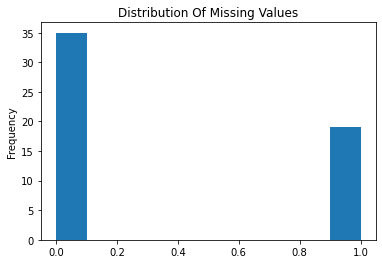

In [ ]:
mis_val = Rdata_train.isnull().sum()
mis_val_bool = mis_val >= 1

mis_val_df = pd.concat([mis_val, mis_val_bool], axis = 1)
mis_val_df = mis_val_df.rename(columns = {0 : 'mis_val', 1 : 'mis_val_bool'})

print("데이터 결측치 값")
print(mis_val_df['mis_val_bool'].value_counts()) # True가 결측치가 있다는 뜻

mis_val_df['mis_val_bool'].astype(int).plot.hist(title = "Distribution Of Missing Values")

In [ ]:
mis_val_df.loc[mis_val_df['mis_val_bool'] == True, :]

,mis_val,mis_val_bool
CD,1394,True
FH2O,10205,True
FNOX,10205,True
FOPTIMETHGLY,10205,True
FOXID,10205,True
FSO4,10205,True
FTBN,10205,True
FUEL,10205,True
K,2299,True
SOOTPERCENTAGE,10205,True


In [ ]:
mis_val_df['ratio'] = mis_val_df['mis_val'] / 14095
mis_val_df

# 결측 비율 : 9.9%, 72.4%, 16.3%, 83.6%, 85.0%, 73.6% 로 총 6가지의 비율로 나타남 
# 즉, 대회에서 데이터를 줄 때, 특정한 변수들의 데이터를 한꺼번에 지운 것으로 보임 
# 변수 1개의 값만 지운 것이 아닌, 여러 개의 변수 값을 한꺼번에 지운 것 같음. 

,mis_val,mis_val_bool,ratio
ID,0,False,0.000000
COMPONENT_ARBITRARY,0,False,0.000000
ANONYMOUS_1,0,False,0.000000
YEAR,0,False,0.000000
SAMPLE_TRANSFER_DAY,0,False,0.000000
ANONYMOUS_2,0,False,0.000000
AG,0,False,0.000000
AL,0,False,0.000000
B,0,False,0.000000
BA,0,False,0.000000


In [ ]:
missing_variable = mis_val_df.loc[mis_val_df['mis_val_bool'] == True, :].index
missing_variable

Index(['CD', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4', 'FTBN', 'FUEL',
       'K', 'SOOTPERCENTAGE', 'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6',
       'U4', 'V100'],
      dtype='object')

In [ ]:
missing_list = pd.DataFrame(0, columns = missing_variable, index = missing_variable)
train_isnull = Rdata_train.isnull()

for mv in missing_variable :
  temp_data = train_isnull.loc[train_isnull[mv] == True, :]
  for j in missing_list :
    if mv == j :
      missing_list.loc[mv, j] = 1
    else :
      missing_list.loc[mv, j] = temp_data.loc[temp_data[j] == True, :].shape[0] / temp_data.shape[0]


In [ ]:
missing_list
# 어느 한 변수에서 결측이 된 데이터가 다른 변수에서도 결측이 됐는지를 확인해봤는데 
# 대부분의 변수들이 함께 결측 된 것을 확인

,CD,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FUEL,K,SOOTPERCENTAGE,U100,U75,U50,U25,U20,U14,U6,U4,V100
CD,1.000000,0.535151,0.535151,0.535151,0.535151,0.535151,0.535151,0.535151,0.000000,0.535151,0.758967,0.758967,0.758967,0.758967,0.758967,0.885222,0.885222,0.885222,0.610473
FH2O,0.073101,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.193141,1.000000,0.773052,0.773052,0.773052,0.773052,0.773052,0.792455,0.792455,0.792455,1.000000
FNOX,0.073101,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.193141,1.000000,0.773052,0.773052,0.773052,0.773052,0.773052,0.792455,0.792455,0.792455,1.000000
FOPTIMETHGLY,0.073101,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.193141,1.000000,0.773052,0.773052,0.773052,0.773052,0.773052,0.792455,0.792455,0.792455,1.000000
FOXID,0.073101,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.193141,1.000000,0.773052,0.773052,0.773052,0.773052,0.773052,0.792455,0.792455,0.792455,1.000000
FSO4,0.073101,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.193141,1.000000,0.773052,0.773052,0.773052,0.773052,0.773052,0.792455,0.792455,0.792455,1.000000
FTBN,0.073101,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.193141,1.000000,0.773052,0.773052,0.773052,0.773052,0.773052,0.792455,0.792455,0.792455,1.000000
FUEL,0.073101,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.193141,1.000000,0.773052,0.773052,0.773052,0.773052,0.773052,0.792455,0.792455,0.792455,1.000000
K,0.000000,0.857329,0.857329,0.857329,0.857329,0.857329,0.857329,0.857329,1.000000,0.857329,0.913006,0.913006,0.913006,0.913006,0.913006,0.922140,0.922140,0.922140,0.883863
SOOTPERCENTAGE,0.073101,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.193141,1.000000,0.773052,0.773052,0.773052,0.773052,0.773052,0.792455,0.792455,0.792455,1.000000


**결측 그룹**

(CD)  
(FH2O, FNOX, FOPTIMETHGLY, FOXID, FSO4, FTBN, FUEL, SOOTPERCENTAGE)  
(K)  
(U100, U75, U50, U25, U20)  
(U14, U6, U4)  
(V100)

# 4. 중복값 여부

In [ ]:
len(Rdata_train['ID'].unique()) # 14095 -> 읍다.

14095

In [ ]:
len(Rdata_test['ID'].unique()) # 6041 -> 역시 읍다.

6041

# 5. 시계열 여부

변수 중 YEAR라는 변수가 있다. 오일 샘플 및 진단 해를 의미한다.  
그러나 해라는 변수가 시계열 변수라고 말하기는 조금 어렵다.  
너무 거시적인 변수이기 때문에  
또 하나가 있다. SAMPLE_TRANSFER_DAY  
그러나 이건 test 데이터에는 없다. 따라서 사용이 어려울 것이다.

In [ ]:
Rdata_train.groupby(['YEAR'])['YEAR'].count() # 2007년부터 2022년까지의 데이터

YEAR
2007     328
2008    1419
2009     949
2010     866
2011    1146
2012    1073
2013    1189
2014    1400
2015    1156
2016     942
2017     896
2018     878
2019     649
2020     373
2021     477
2022     354
Name: YEAR, dtype: int64

In [ ]:
Rdata_test.groupby(['YEAR'])['YEAR'].count() # 2007년부터 2022년까지의 데이터

YEAR
2007    141
2008    610
2009    399
2010    395
2011    465
2012    463
2013    540
2014    567
2015    491
2016    430
2017    371
2018    354
2019    272
2020    183
2021    210
2022    150
Name: YEAR, dtype: int64

# 6. 불균형 여부

In [ ]:
Rdata_train.groupby(['Y_LABEL'])['Y_LABEL'].count()
# Y 불균형 맞다

Y_LABEL
0    12892
1     1203
Name: Y_LABEL, dtype: int64

In [ ]:
print(round(1203 / 14095 * 100, 3)) # 비정상의 비율 8.54% 

8.535
